Task3: Number Recognition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(8000, 785)
(5000, 785)


In [4]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,8000.000000,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.0,8000.0,8000.0,8000.0,8000.0
mean,4.444875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.174125,0.115500,0.070875,0.043125,0.042125,0.0,0.0,0.0,0.0,0.0
std,2.888686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.539846,4.082798,3.710670,2.333601,2.290307,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,187.000000,154.000000,0.0,0.0,0.0,0.0,0.0


In [7]:
df_test.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,5000.00000,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,4.47180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.242000,0.162400,0.026000,0.001200,0.0,0.0,0.0,0.0,0.0,0.0
std,2.88965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.488132,5.331652,1.024468,0.084853,0.0,0.0,0.0,0.0,0.0,0.0
min,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,231.000000,52.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0


Data Visualization

In [8]:
train_images=np.reshape(df_train.drop(columns='label').values,(8000,28,28))
test_images=np.reshape(df_test.drop(columns='label').values,(5000,28,28))

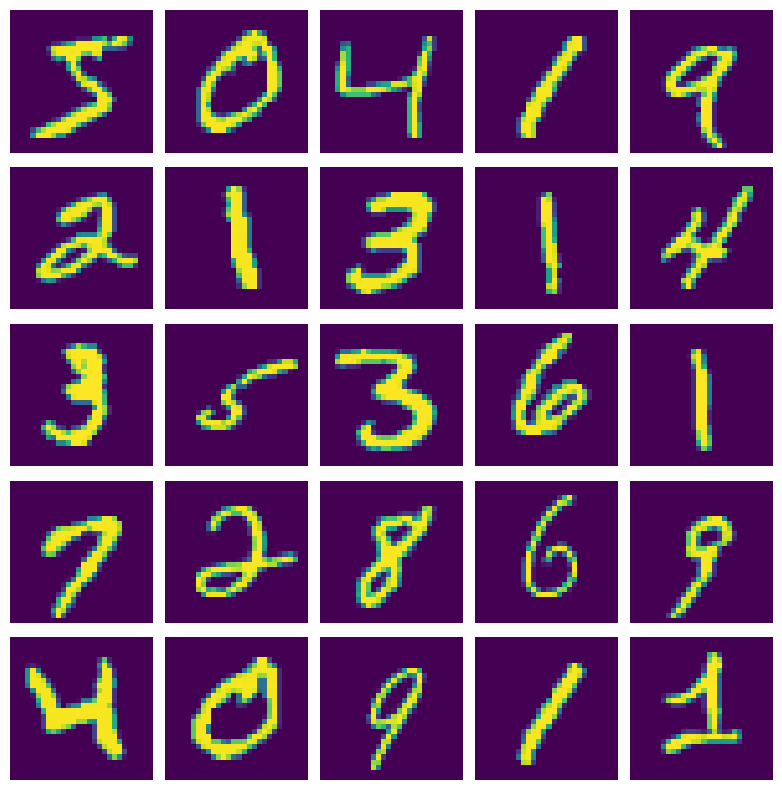

In [9]:
plt.figure(figsize=(10,10))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i,:,:])
    plt.axis('off')
plt.subplots_adjust(wspace=0.0, hspace=0.1)

In [10]:
X_Train = df_train.drop(columns='label').values/255
X_Test = df_test.drop(columns='label').values/255
Y_Train=df_train['label'].values
Y_Test=df_test['label'].values

Model Building and Compilation

In [11]:
model = Sequential()
model.add(Dense(64,activation='relu',input_dim=784))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
X_Train_fit=model.fit(
    X_Train,
    to_categorical(Y_Train),
    epochs=10,
    batch_size=50
)

Epoch 1/10
160/160 [==============================] - 11s 10ms/step - loss: 0.8047 - accuracy: 0.7816
Epoch 2/10
160/160 [==============================] - 2s 11ms/step - loss: 0.2901 - accuracy: 0.9191
Epoch 3/10
160/160 [==============================] - 1s 9ms/step - loss: 0.2200 - accuracy: 0.9383
Epoch 4/10
160/160 [==============================] - 2s 10ms/step - loss: 0.1810 - accuracy: 0.9466
Epoch 5/10
160/160 [==============================] - 2s 10ms/step - loss: 0.1465 - accuracy: 0.9566
Epoch 6/10
160/160 [==============================] - 2s 13ms/step - loss: 0.1213 - accuracy: 0.9653
Epoch 7/10
160/160 [==============================] - 2s 15ms/step - loss: 0.0986 - accuracy: 0.9728
Epoch 8/10
160/160 [==============================] - 2s 13ms/step - loss: 0.0868 - accuracy: 0.9765
Epoch 9/10
160/160 [==============================] - 2s 11ms/step - loss: 0.0683 - accuracy: 0.9830
Epoch 10/10
160/160 [==============================] - 2s 12ms/step - loss: 0.0551 - accura

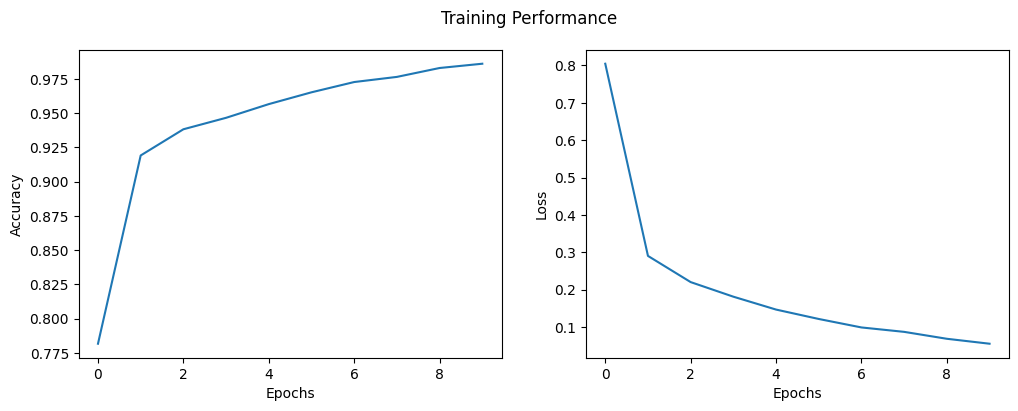

In [14]:
plt.figure(figsize=(12,4))
plt.suptitle('Training Performance')

plt.subplot(121)
plt.plot(X_Train_fit.epoch,X_Train_fit.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(122)
plt.plot(X_Train_fit.epoch,X_Train_fit.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

Model Evaluation

In [15]:
model.evaluate(
    X_Test,
    to_categorical(Y_Test)
)

157/157 [==============================] - 3s 7ms/step - loss: 0.2612 - accuracy: 0.9238


[0.26117122173309326, 0.923799991607666]

Result Visualization

In [16]:
indices = np.random.randint(1000,size=25)

In [17]:
predictions=model.predict(X_Test[indices,:])

print(np.argmax(predictions,axis=1))
print(Y_Test[indices])

1/1 [==============================] - 1s 833ms/step
[9 6 5 3 7 7 4 0 4 9 6 3 6 5 9 9 8 3 2 7 7 9 8 4 1]
[9 3 5 3 7 7 4 0 4 9 6 3 6 5 9 9 8 3 2 7 7 9 8 4 1]


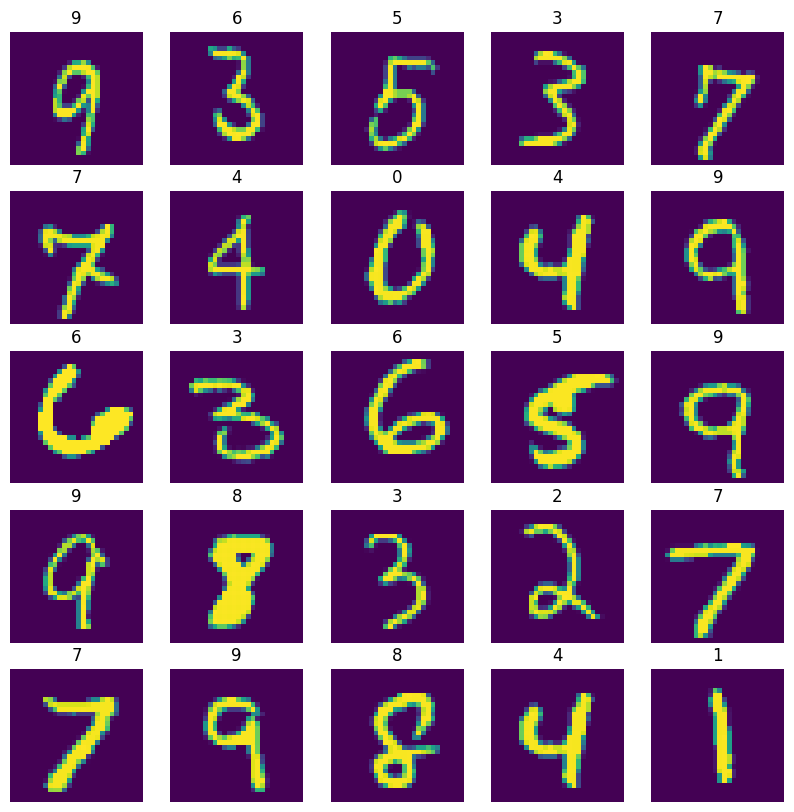

In [18]:
plt.figure(figsize=(10,10))
j=0
for i in indices:
    plt.subplot(5,5,j+1)
    plt.imshow(test_images[i,:,:])
    plt.axis('off')
    plt.title(str(np.argmax(predictions,axis=1)[j]))
    j=j+1
plt.show()